In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from statsmodels.tsa.stattools import adfuller
from pandas import Series

In [2]:
data = pd.read_csv('/Users/marcos/Documents/00_Git_Projetos/SeriesTemporais/SeriesTemporais_Python/Download/Dados/AirPassengers.csv',
                   parse_dates=['Month'], index_col='Month') #, date_parser=dateparse)

In [33]:
rolmean = data.rolling(window=12).mean()
rolstd = data.rolling(window=12).std()
print(rolmean)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]


In [34]:
print(rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


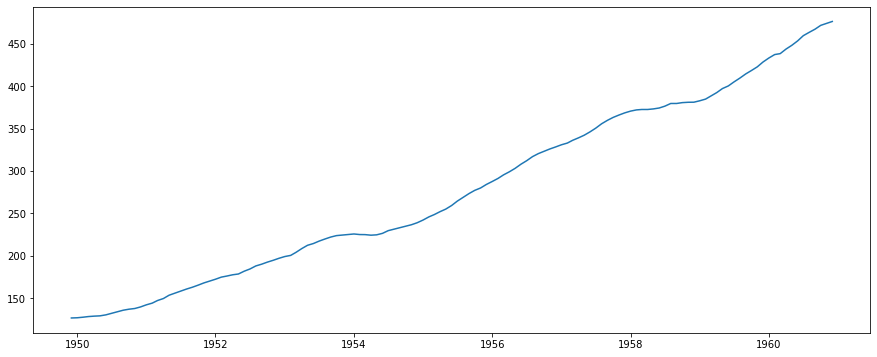

In [35]:
plt.plot(rolmean)

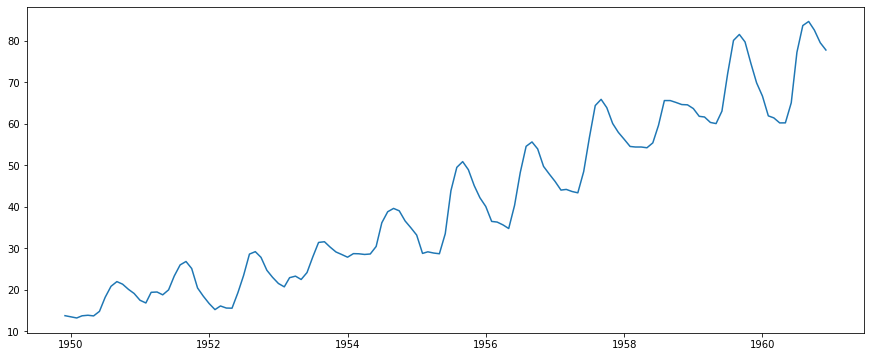

In [36]:
plt.plot(rolstd)

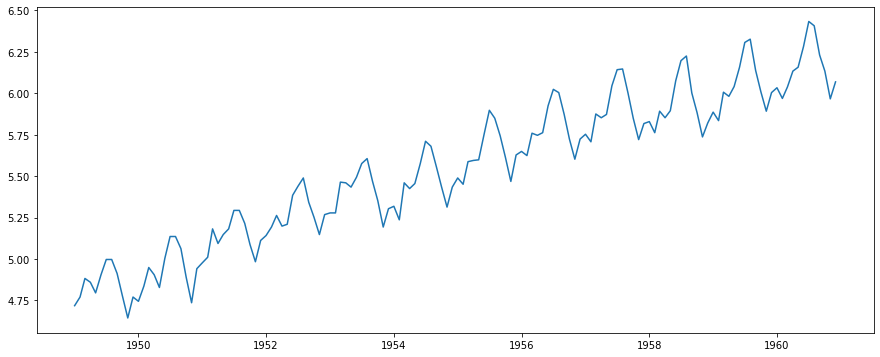

In [37]:
indexedDataset_logScale = np.log(data)
plt.plot(indexedDataset_logScale)

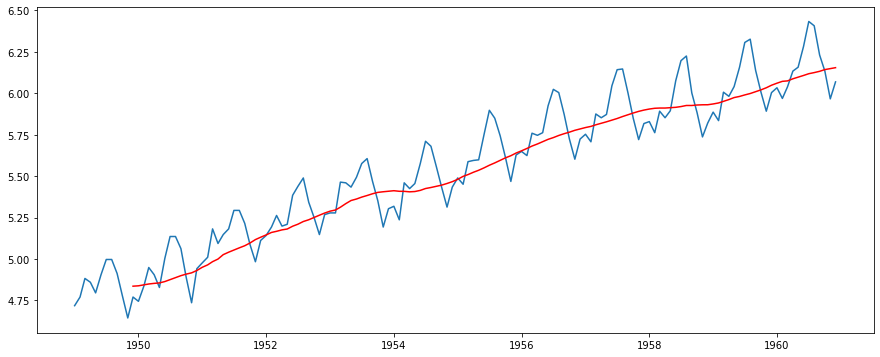

In [38]:
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')

In [39]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [40]:
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(12)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [45]:
from statsmodels.tsa.stattools import adfuller

In [56]:
def test_stationarity(timeseries):
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Média Móvel')
    std = plt.plot(movingSTD, color='black', label='Desvio Padrão')
    plt.legend(loc='best')
    plt.title('Média Móvel e Desvio Padrão')
    print('Resultados do Teste de Dickey-Fuller')
    dftest = adfuller(timeseries['#Passengers'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Estatística de Teste', 'Valor de P', '# de invervalos', '# de observações'])
    for key, value in dftest[4].items():
        dfoutput['Valor Crítico ({})'.format(key)] = value
    print(dfoutput)

Resultados do Teste de Dickey-Fuller
Estatística de Teste     -3.162908
Valor de P                0.022235
# de invervalos          13.000000
# de observações        119.000000
Valor Crítico (1%)       -3.486535
Valor Crítico (5%)       -2.886151
Valor Crítico (10%)      -2.579896
dtype: float64


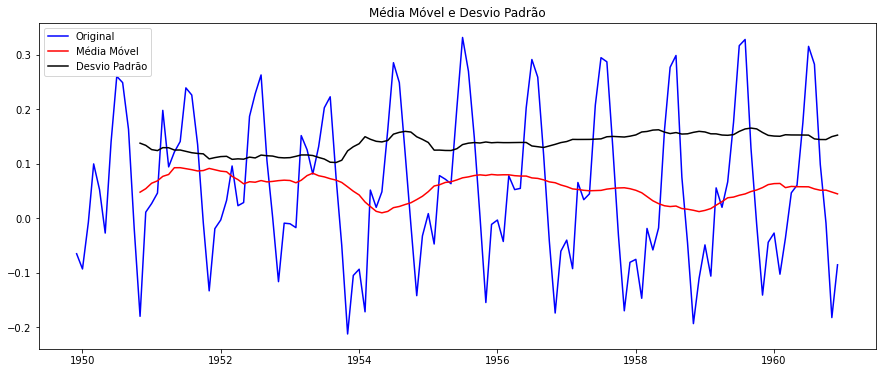

In [57]:
test_stationarity(datasetLogScaleMinusMovingAverage)